###### Linear regression: $y_i = b \cdot x_i + a + \varepsilon_i$

Our aim is to minimize function $F = \Sigma_i (y_i - a - bx_i)^2$ where $a, b$ are vars. 

As F is a 2 parameter function of paraboloic type it has ONE global minima.

It could be found via
system of equations: $F'_a = 0$ and $F'_b = 0$.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("data.csv")
df.head() 

,km,price
0,240000,3650
1,139800,3800
2,150500,4400
3,185530,4450
4,176000,5250


In [3]:
##########################
# These are GLOBAL coefs #
# for linear regression  #
##########################

theta0 = 0
theta1 = 0

In [4]:
#######################
# Actual linear model #
# for prediction      #
#######################

def EvalPrice(mileage):
    global theta0, theta1
    
    #################
    # Y = t1 * X + t0
    return theta0 + theta1 * mileage

In [5]:
#############
# Predictor #
#############

mileage = int(input())
print("predicted price: {}".format(EvalPrice(mileage)))

123
predicted price: 0


In [6]:
#############################
# Learner (fit the model...)#
#############################

# Unused vars ??????
maxTrainIterations = 1000
learningRate = 0.1


def Fit(df_path):
    ###############################
    # Extern globals for project...
    global theta0, theta1, learningRate, maxTrainIterations
    
    df = pd.read_csv(df_path)
    x = df['km']
    y = df['price']
    plt.scatter(x, y, alpha=0.5)
    
    ####################
    # scatter before fit
    oldPredictorX = [a for a in range(30000, 250000, 1000)]
    oldPredictorY = [EvalPrice(a) for a in oldPredictorX]
    plt.scatter(oldPredictorX, oldPredictorY, alpha=0.5)
    
    #####
    # fit
    tmp_theta1 = np.cov(df['km'],  df['price'])[0][1] / np.var(df['km'])
    tmp_theta0 = np.mean(df['price']) - tmp_theta1 * np.mean(df['km'])
        
    theta0 = tmp_theta0
    theta1 = tmp_theta1

    ###################
    # scatter after fit
    oldPredictorX = [a for a in range(30000, 250000, 1000)]
    oldPredictorY = [EvalPrice(a) for a in oldPredictorX]
    plt.scatter(oldPredictorX, oldPredictorY, alpha=0.5)
    
    ###########
    # show plot
    plt.show()
    df['price_pred'] = df['km'].apply(lambda x: EvalPrice(x))    
    print("Model precision: " , round(np.sqrt(np.mean((df['price_pred'] - df['price']) ** 2)), 2))

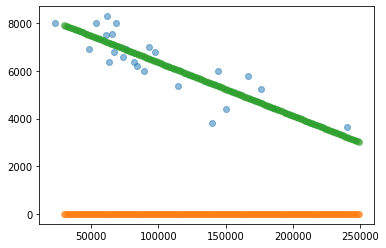

Model precision:  669.3


In [7]:
Fit("data.csv")